In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from pylab import rcParams
from sympy.sets import Interval
from sympy.calculus.util import continuous_domain

In [2]:
#Tamanho plot
rcParams['figure.figsize'] = 17, 9

x, w = symbols('x w')

In [3]:
def graficoPlot(func, x_o, x_f):
    fig, ax = plt.subplots()

    xx = np.linspace(x_o, x_f, 1000)
    yy = lambdify(x, func, "numpy")(xx)
    ax.plot(xx, np.transpose(yy))

    ax.set_title('Função - {}'.format(str(func)))
    ax.set_ylabel('y')
    ax.set_xlabel('x')

In [4]:
def interpoladoLagrange(x, y):
    poli = 0*w 
    for i in range(len(x)):
        Li = 1 + 0*w
        for j in x:
            if j != x[i]:
                Li = Li * ((w - j)/(x[i] - j))
        poli = poli + y[i] * Li
    return expand(poli)

In [11]:
def trapezioPlot(func, x_o, x_f, n):
    fig, ax = plt.subplots()

    xxFunc = np.linspace(x_o, x_f, n*1000)
    yyFunc = lambdify(x, func, "numpy")(xxFunc)
    ax.plot(xxFunc, np.transpose(yyFunc))

    ax.set_title('Função - {}'.format(str(func)))
    ax.set_ylabel('y')
    ax.set_xlabel('x')

    h = (x_f - x_o)/n
    x_i = x_o
    for i in range(n):
        x_h = x_i + h
        
        dados = pd.DataFrame({'x': [x_i, x_i + h],
                              'y': [(func.subs(x, x_i)).evalf(), (func.subs(x, x_h)).evalf()]})
        reta = interpoladoLagrange(dados['x'], dados['y'])
        
        xx = np.linspace(x_i, x_h, 1000)
        yy = lambdify(w, reta, "numpy")(xx)
        ax.plot(xx, np.transpose(yy), color='#555555')
        ax.fill_between(xx, yy, 0, alpha=0.20, color='#555555')

        yyFunc_fill = np.split(yyFunc, n)[i]
        ax.fill_between(xx, yy, yyFunc_fill, alpha=0.50, color='#555555')
        ax.vlines(x_i, 0, (func.subs(x, x_i)).evalf(), linestyles='dashed', color='#555555')
        ax.vlines(x_h, 0, (func.subs(x, x_h)).evalf(), linestyles='dashed', color='#555555')
        x_i = x_i + h


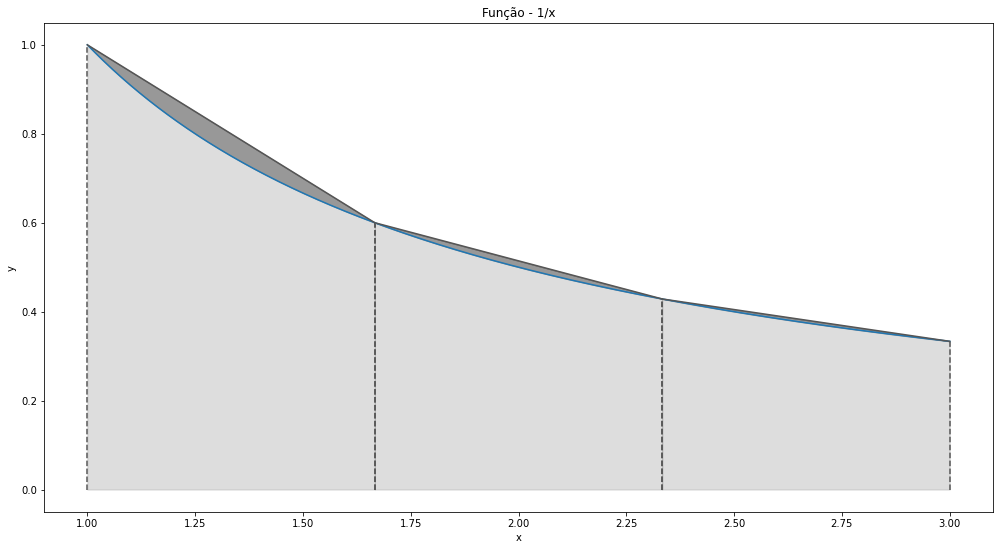

In [12]:
trapezioPlot(1/x, 1, 3, 3)

In [6]:
def calculoArea(func, x_o, x_f, n):
    area = 0
    h = (x_f - x_o)/n
    x_i = x_o
    for i in range(n):
        area = area + (func.subs(x, x_i).evalf() + func.subs(x, x_i + h).evalf())*h/2
        x_i = x_i + h
    return area


In [7]:
def calculoErro(func, x_o, x_f, n):
    h = (x_f - x_o)/n
    
    diff_2 = diff(diff(func, x), x)
    xx = np.linspace(x_o, x_f, 1000)
    yy = lambdify(x, diff_2, "numpy")(xx)
    M_2 = max(yy)

    erro = n*M_2*h**3/12
    return erro

In [8]:
def calculoN(func, x_o, x_f, erro):
    diff_2 = diff(diff(func, x), x)
    xx = np.linspace(x_o, x_f, 1000)
    yy = lambdify(x, diff_2, "numpy")(xx)
    M_2 = max(yy)

    n = np.sqrt((M_2*(x_f - x_o)**3)/(12*erro))
    return np.ceil(n)

In [9]:
def verifica_continuidade(func, x_o, x_f):
    if continuous_domain(func, x, Interval(x_o, x_f)) == Interval(x_o, x_f):
        return "Função é continua no intervalo"
    else:
        return "A Função não é continua no intervalo, Indique outro Intervalo"

In [10]:
def integralDefinida(func, x_o, x_f):
    try:
        return N(integrate(func, (x, x_o, x_f)))
    except:
        return "Função não integravel por métodos convencionais"